Importing my linear regression model and the sklearn model. Also importing other necessary libraries

In [38]:
from sklearn.linear_model import LinearRegression
from simple_linear_regression import step
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

Importng and sorting out dataset

In [39]:
sklearn_model = LinearRegression()
studies = pd.read_csv("score_updated.csv")

In [40]:
print(studies.head())
hours_studied = studies['Hours']
scores = studies['Scores']

print (scores.shape)
print(hours_studied.shape)
scores_reshaped = np.array(scores).reshape(-1,1)
hours_reshaped = np.array(hours_studied).reshape(-1,1)

print(scores_reshaped.shape)
print(hours_reshaped.shape)

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
(96,)
(96,)
(96, 1)
(96, 1)


Fitting the features to both the sklearn model and my model

In [41]:
sklearn_model.fit(hours_reshaped, scores_reshaped)
print(sklearn_model.coef_)

our_m,our_c = step(0,0,hours_reshaped.flatten(),scores_reshaped.flatten(),0.001,5000)
print(our_m)

[[9.90131826]]
There should be 5000 iterations
9.909485098148497


[26.584933230003568, 52.34959448518966, 33.521572798707524, 86.04184381889456, 36.49441832815207, 16.675448131855074, 92.9784833875985, 56.31338852444907, 84.05994679926486, 28.56683024963327, 78.11425574037577, 60.277182563708465, 46.403903426300566, 34.512521308522366, 12.711654092595674, 90.00563785815396, 26.584933230003568, 20.63924217111447, 62.25907958333816, 75.14141021093121, 28.56683024963327, 49.376748955745114, 39.46726385759662, 70.18666766185696, 79.10520425019061, 43.43105789685602, 95.95132891704306, 59.286234053893615, 24.60303621037387, 48.38580044593027, 17.666396641669923, 90.9965863679688, 63.25002809315301, 82.07804977963515, 40.45821236741147, 23.612087700559023, 72.16856468148666, 64.24097660296786, 54.33149150481936, 45.412954916485724, 19.648293661299622, 94.96038040722821, 68.20477064222726, 38.47631534778177, 74.15046170111636, 42.44010938704117, 81.08710126982031, 32.53062428889267, 14.693551112225373, 58.295285544078766, 29.557778759448116, 80.096152760005

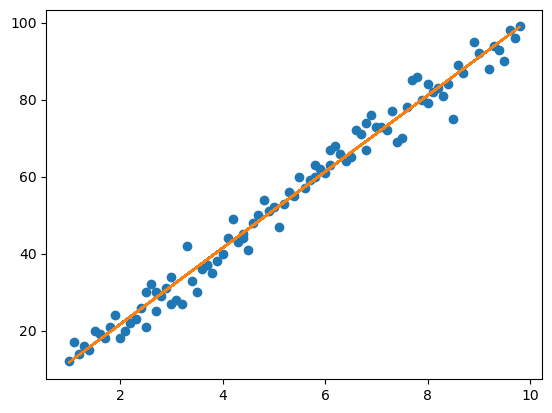

In [42]:
sklearn_predicted = sklearn_model.predict(hours_reshaped)

my_predicted = []
for x in hours_studied:
    y_prediction = ((our_m*x) + our_c)
    my_predicted.append(y_prediction)
print(my_predicted)

plt.scatter(hours_reshaped,scores_reshaped)
plt.plot(hours_reshaped,sklearn_predicted)
plt.plot(hours_studied,my_predicted)



In [43]:
print (f"My coefficient: {our_m}, Sklearn's coeficcient: {sklearn_model.coef_}")
print (f"My intercept: {our_c}, Sklearn's intercept: {sklearn_model.intercept_}")

My coefficient: 9.909485098148497, Sklearn's coeficcient: [[9.90131826]]
My intercept: 1.8112204846323263, Sklearn's intercept: [1.86357663]


My gradient descent model and scikit-learn’s LinearRegression give nearly identical results. The difference between the coefficients is only about 0.008, and the intercepts differ by around 0.05. The two lines overlap so closely on the graph that you can’t even tell them apart — which shows that the implementation from scratch is working exactly as expected.